## Problem Definition

In platforms like last.fm, users generally add tags to make the song get seen by those who wish listening them. Some users find what they will listen with these tags which includes information about the genres. Although, there are many missing tags which lead users spend more time finding what to listen. For this problem, we want you to implement machine learning algorithms to improve data quality of the last.fm, and the user experience. 

<b>Your task is here, classifiying  whether given song's genre is progressive rock or pop by its lyrics.</b><p>That project is different than other classification-based projects. So, after you complete that assignment; you will be able to comprehend many basic concepts of Natural Language Processing.</p>

#### **The homework is due Sunday, October 17 midnight.** 

## Import Libraries

Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful):  
<li><a href = 'https://pandas.pydata.org/'>
Pandas
</a></li> 
<li><a href = 'https://numpy.org/'>
Numpy
</a></li> 
<li><a href = 'https://scikit-learn.org/'>
Sklearn 
</a></li> 
<li><a href = 'https://docs.python.org/3/library/re.html'>
re
</a></li> 
<li><a href = 'https://www.nltk.org/'>
nltk
</a></li> 
<li><a href = 'https://amueller.github.io/word_cloud/'>
WordCloud 
</a></li>



In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import sklearn as sl
import wordcloud as wc

### Import Data

Use <a href = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html'>
pandas.read_excel()
</a>
function for importing your excel file.

In [2]:
### Code here (Write 1 line code to import your data as excel file)

data = pd.read_excel("selected_songs.xlsx")
data_raw = data
data_raw['lyrics'] = [((row.replace("\n", " ")).replace(",", ". ")).replace("?", "? ") for row in data_raw['lyrics']]

P.S.: data_raw is created now to be used in the 2nd part of the question.

In [3]:
data

genre                                             lyrics           Artist  \
0    prog  I am just a new boy.  Stranger in this town.. ...       Pink Floyd   
1    prog  Eins.  zwei.  drei.  alle!. Ooooh You cannot r...       Pink Floyd   
2    prog  All alone.  or in twos.  The ones who really l...       Pink Floyd   
3    prog  Into the distance a ribbon of black.  Stretche...       Pink Floyd   
4    prog  You got to be crazy.  gotta have a real need. ...       Pink Floyd   
..    ...                                                ...              ...   
825   pop  I Don't Know.  That You Want To Try.  Evertime...  Michael Jackson   
826   pop  Girl.  close your eyes.  Let that rhythm get i...  Michael Jackson   
827   pop  Help.  I have done it again.  I have been here...              Sia   
828   pop  Yeah.  Rihanna. Good Girl Gone Bad.  Take thre...          Rihanna   
829   pop  Work.  work.  work.  work.  work.  work. He sa...          Rihanna   

                             Song  
0               Young Lust Lyrics  
1    Waiting For The Worms Lyrics  
2         Outside The Wall Lyrics  
3          Learning To Fly Lyrics  
4                     Dogs Lyrics  
..                            ...  
825      Remember The Time Lyrics  
826          Rock With You Lyrics  
827             Breathe Me Lyrics  
828               Umbrella Lyrics  
829                   Work Lyrics  

[830 rows x 4 columns]

## PART I : Data Preprocessing

<a href="https://www.edupristine.com/blog/text-mining-overview">Here </a> is a brief blogpost about text mining steps and terminology used below.If you want more detail about text mining and nltk library in Python, this <a href="https://www.youtube.com/watch?v=05ONoGfmKvA">video</a> could help. 


### 1-) Removing Numbers, Punctuations and Lower the Words

In [4]:
# Please run the code
def rid_of_specials(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

#### a.Apply <b>rid_of_specials</b> to lyrics column in your dataset.


In [5]:
data['lyrics'] = [rid_of_specials(item) for item in data['lyrics']]

In [6]:
data['lyrics'][0]

'i am just a new boy   stranger in this town    where are all the good times     who s gonna show this stranger around    ooooh   i need a dirty woman   ooooh   i need a dirty girl    will some woman in this desert land   make me feel like a real man     take this rock and roll refugee  oooh   babe set me free    ooooh   i need a dirty woman    ooooh   i need a dirty girl    ooooh   i need a dirty woman    ooooh   i need a dirty girl '

#### b.Explain what above code cell does step by step and why you run it. 

The function above takes a collection of words and removes any punctuation or special characters from them and makes the uppercase characters lowercase and finally returns the modified collection. The code below applies the function to every row of the data's 'lyrics' column.

### 2-) Tokenize

In [7]:
from nltk.tokenize import word_tokenize
tokenized = [word_tokenize(i) for i in data['lyrics']]

In [8]:
tokenized

[['i',
  'am',
  'just',
  'a',
  'new',
  'boy',
  'stranger',
  'in',
  'this',
  'town',
  'where',
  'are',
  'all',
  'the',
  'good',
  'times',
  'who',
  's',
  'gon',
  'na',
  'show',
  'this',
  'stranger',
  'around',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'woman',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'girl',
  'will',
  'some',
  'woman',
  'in',
  'this',
  'desert',
  'land',
  'make',
  'me',
  'feel',
  'like',
  'a',
  'real',
  'man',
  'take',
  'this',
  'rock',
  'and',
  'roll',
  'refugee',
  'oooh',
  'babe',
  'set',
  'me',
  'free',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'woman',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'girl',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'woman',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'girl'],
 ['eins',
  'zwei',
  'drei',
  'alle',
  'ooooh',
  'you',
  'can',
  'not',
  'reach',
  'me',
  'now',
  'ooooh',
  'no',
  'matter',
  'how',
  'you',
  'try',
  'goodbye',
  'cruel'

### 3-) Removing Stopwords

In [9]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

stopped = [[i for i in j if i not in stop_words] for j in tokenized]

In [10]:
stopped

[['new',
  'boy',
  'stranger',
  'town',
  'good',
  'times',
  'gon',
  'na',
  'show',
  'stranger',
  'around',
  'ooooh',
  'need',
  'dirty',
  'woman',
  'ooooh',
  'need',
  'dirty',
  'girl',
  'woman',
  'desert',
  'land',
  'make',
  'feel',
  'like',
  'real',
  'man',
  'take',
  'rock',
  'roll',
  'refugee',
  'oooh',
  'babe',
  'set',
  'free',
  'ooooh',
  'need',
  'dirty',
  'woman',
  'ooooh',
  'need',
  'dirty',
  'girl',
  'ooooh',
  'need',
  'dirty',
  'woman',
  'ooooh',
  'need',
  'dirty',
  'girl'],
 ['eins',
  'zwei',
  'drei',
  'alle',
  'ooooh',
  'reach',
  'ooooh',
  'matter',
  'try',
  'goodbye',
  'cruel',
  'world',
  'walk',
  'sitting',
  'bunker',
  'behind',
  'wall',
  'waiting',
  'worms',
  'come',
  'worms',
  'come',
  'perfect',
  'isolation',
  'behind',
  'wall',
  'waiting',
  'worms',
  'come',
  'worms',
  'come',
  'audience',
  'convene',
  'one',
  'fifteen',
  'outside',
  'brixton',
  'town',
  'hall',
  'going',
  'waiting',

#### a.Explain what above code cell does step by step and why you run it. 

NLTK library has the list of stopwords in English (and, in, on, or etc.) and these stopwords are imported to our program. Then the list of words from each song's lyrics ('tokenized') are cleaned to exclude the stopwords from them. We run it to exclude any words that would be meaningless out of the context, so we can know what the context is for each song.

### 4-) Lemmatization

In [11]:
# Please run the code
from nltk.stem import WordNetLemmatizer
# Step 1
lemmatizer = WordNetLemmatizer()
# Step 2
lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]
# Step 3
prepeared_sentence= [' '.join(j) for j in lemmatized]
data['Lyrics_Processed'] = prepeared_sentence

#### a.Explain what above code cell does step by step and why you run it. 

Lemmatizer function clears any prefixes, postfixes, tenses and possesive suffixes from each word (i.e. Lemmatizer("guys") = "guy"), so we execute the function for every song's cleaned lyrics. Then, with the join method each list of words are joined to compose a sentence. Lastly, the sentence is inserted into the dataframe as a row under the column "Lyrics_Processed". 

#### b.Explain what lemmatization is used for.

It is essentially a semantic tool that allows large texts to be more uniform, which allows one to practice any kind of statistics and analysis more easily.

#### c. Which method can be used instead of Lemmatization method and explain differences.

Stemming could be used instead of Lemmatization. Stemming tries to find the derivative affixes while Lemmatization mostly focuses on the inflectional suffixes. So, in a way, Stemming gets closer to the meaning while Lemmatization gets closer to the word itself.

### 5-) Vectorization

In [12]:
# Please run the code
from sklearn.feature_extraction.text import CountVectorizer
#Step 1
vectorizer = CountVectorizer()
#Step 2
X = vectorizer.fit_transform(prepeared_sentence)
#Step 3
feature_names = vectorizer.get_feature_names()
#Step 4
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

C:\Users\hkilic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### a.Explain what above code cell does step by step and why you run it. 

Code does the following:  
* Creates a list of unique words from all of the lyrics with CountVectorizer
* Counts the number of times a word has appeared in a song's lyrics, also with CountVectorizer
* Turns this information to a dataframe, with its index being the songs' indices, columns being the unique words and rows being the number of times that word (column) appears in the song (index).

#### b.Explain what countvectorizer is used for.

To create a vector for each song with its components being the number of times a word has appeared in a song.

#### c. Google "TF-IDF Vectorization". Briefly explain the differences from Count Vectorazation.

TF-IDF returns a vector that contains the relative weights of each word, that is, (the number of appearances for a word)/(total number of words) while the CountVectorizer returns only the number of appearances.

### 6-) Target Preperation

Run cells below,

In [13]:
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

In [14]:
y = data.genre.map({'prog':1,'pop':0})
y

0      1
1      1
2      1
3      1
4      1
      ..
825    0
826    0
827    0
828    0
829    0
Name: genre, Length: 830, dtype: int64

Variable y is a single line target preperation step seen above. By looking at that output y, rewrite that target creation step
by using <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>
OneHotEnconder()</a> 
 function.


In [15]:
encoder = sl.preprocessing.OneHotEncoder()
genre = pd.DataFrame(data.genre)
encoded = encoder.fit_transform(genre)
encoded.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## PART II : Exploratory Data Analysis 

Please, perform exploratory data analysis and share your findings. This <a href="https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools">link </a> can be useful.

In [16]:
data_prog = data[data['genre'] == "prog"] # contains the first 413 rows of the original data
data_pop = data[data['genre'] == "pop"] # rows after the 412th.

In [17]:
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

Here we import the vectorized lyrics DataFrame to count the total number of times of appearance of each word in a genre's songs. The cell below returns a sorted dictionary of each word for Progressive Rock.

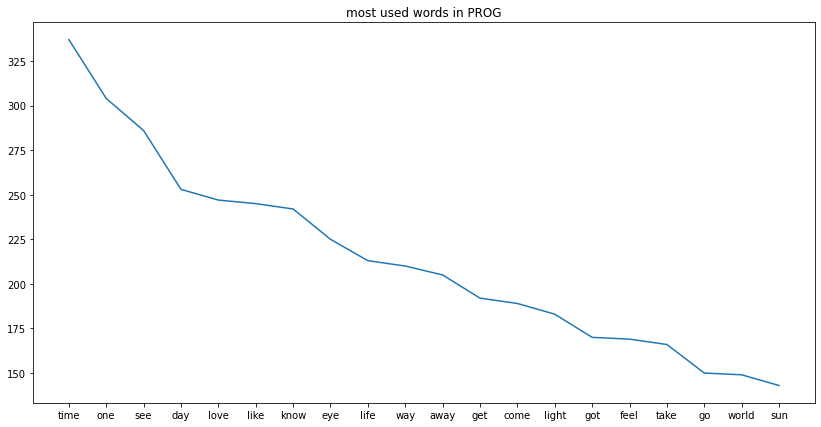

In [18]:
import itertools
import matplotlib.pyplot as pt
lyrics_prog = lyrics_vectorized[:413]
prog_totals = dict(lyrics_prog.sum())
prog_totals = {k: v for k, v in sorted(prog_totals.items(), reverse =True, key=lambda item: item[1])}
prog_totals
first20_prog = dict(itertools.islice(prog_totals.items(), 20))
pt.figure(figsize = (14, 7))
pt.title("most used words in PROG")
pt.plot(first20_prog.keys(), first20_prog.values());

The same is done with the Pop genre in the cell below.

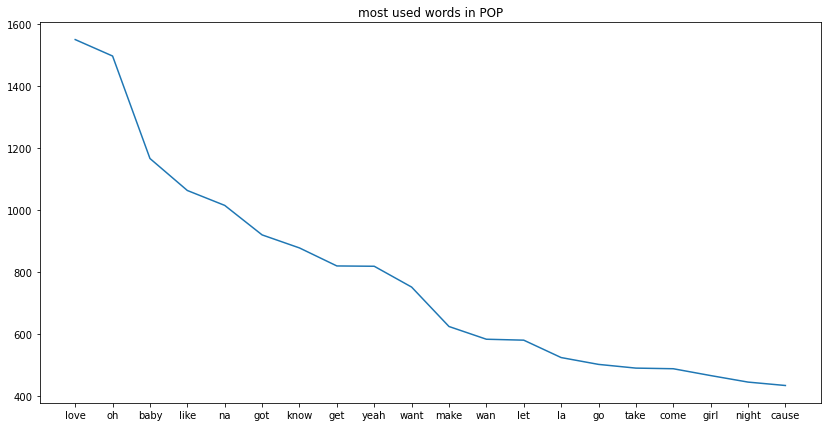

In [19]:
lyrics_pop = lyrics_vectorized[412:]
pop_totals = dict(lyrics_pop.sum())
pop_totals = {k: v for k, v in sorted(pop_totals.items(), reverse =True, key=lambda item: item[1])}
pop_totals
first20_pop = dict(itertools.islice(pop_totals.items(), 20))
pt.figure(figsize = (14, 7))
pt.title("most used words in POP")
pt.plot(first20_pop.keys(), first20_pop.values());

Here, we analyze the average word count per sentence for the two genres.

In [20]:
from nltk.tokenize import sent_tokenize
#PROG
sentences_prog = [sent_tokenize(row) for row in data_raw['lyrics'][:413]]
total_sentences_prog = 0
total_words_prog = 0
for song in sentences_prog:
    for sentence in song:
        total_sentences_prog +=1
        total_words_prog += len(word_tokenize(sentence))
        
avg_word_prog = total_words_prog/total_sentences_prog

# POP
sentences_pop = [sent_tokenize(row) for row in data_raw['lyrics'][412:]]
total_sentences_pop = 0
total_words_pop = 0
for song in sentences_pop:
    for sentence in song:
        total_sentences_pop +=1
        total_words_pop += len(word_tokenize(sentence))

avg_word_pop = total_words_pop/total_sentences_pop

In [21]:
print(f"Average word count per sentence for PROG: {avg_word_prog}")
print()
print(f"Average word count per sentence for POP: {avg_word_pop}")

Average word count per sentence for PROG: 184.5084745762712

Average word count per sentence for POP: 364.40909090909093


## PART III : Feature Creation & Selection

### 1-) Try creating additional features for your models and justify them by explaining. (Optional)

### 2-) Select or eliminate redundant features.

#### a. In theory, the more feauture you can get more accuracy unless there is no noise in your data. In real life, we decrease number of feature for a price of accuracy. Think about it and justify the argument.

#### b. Perform feature selection/elimination and show your codes.

## PART IV : Train - Test Splitting

###### After you complete all pre steps, now it is time to split your data into train and test parts.

On that stage, you need to write sequencial code blocks to split your train and test sets. Justify your approach briefly.

## PART V : Modelling

Perform each algorithm below the list (Feel free if you want use additional algorithm):
<li>Naive Bayes</li>
<li>Decision Trees</li>
<li>Random Forest</li>
<li>GBM</li>

Please, show us how you tune them.

#### 1-) Naive Bayes

#### 2-) Decision Trees

#### 3-) Random Forest

#### 4-) GBM

### PART VI : Model Evaluation

Evaluate your models by using F1 Score and Accuracy Score. Additionally, plot Confusion Matrix and ROC curve. Compare algorithm results in terms of these metrics and comment them.